# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

In [2]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.read_csv("../Ha-emitters-disk/Halpha-disk_splus_Mine_PerField_total-unique_wise.csv")
combined_df

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
0,39118,102.143591,-10.160702,20.274828,0.265458,18.964895,0.060938,17.582357,0.016515,16.942923,...,0000,1,991n,AAAB,120.0,45.0,68.0,45.0,0.074,0.038473
1,4050,106.201938,-10.562264,99.000000,99.000000,19.585411,0.055907,17.542591,0.009629,16.445004,...,0h00,1,0100,AAAA,415.0,42.0,273.0,40.0,0.440,0.421220
2,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,0h00,0,100n,AABU,11.0,130.0,357.0,126.0,0.101,0.050432
3,12974,106.225421,-10.450525,20.789003,0.188930,19.810198,0.066266,18.429539,0.017234,17.340002,...,dd00,1,42nn,AAUU,-145.0,87.0,-929.0,96.0,0.557,0.570206
4,19125,106.249120,-10.370369,21.454640,0.340462,20.022272,0.077668,18.352077,0.016190,17.283308,...,0000,1,1000,AAAB,510.0,79.0,-187.0,88.0,0.960,0.917007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,230512,134.176840,-56.064895,20.632883,0.253066,16.022709,0.005175,13.017000,0.000912,12.538829,...,0h00,0,0000,AAAA,-193.0,27.0,-4.0,27.0,0.174,0.113072
2453,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,hhH0,0,nnnn,AAUU,138.0,57.0,318.0,63.0,0.325,0.422898
2454,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,0000,0,031n,AAAU,0.0,28.0,55.0,29.0,0.080,0.119198
2455,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,0h00,0,99nn,AABU,28.0,35.0,1.0,38.0,0.088,0.089227


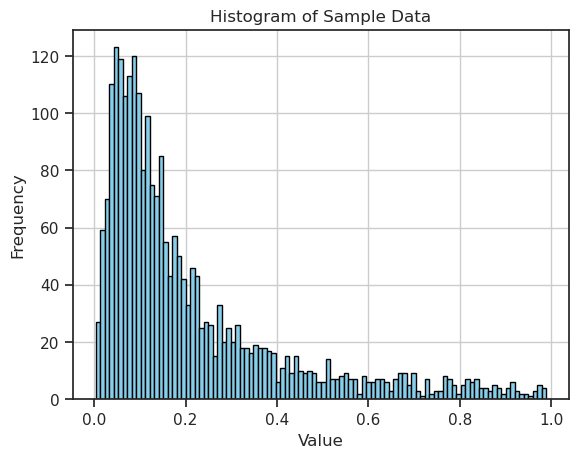

In [3]:
# See the distance of the SPLUS nad WISE source
# Plotting the histogram
plt.hist(combined_df["angDist"], bins=100, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [4]:
for columns in combined_df.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r
AllWISE
RAJ2000
DEJ2000
eeMaj
eeMin
eePA
W1mag
W2mag
W3mag
W4mag
Jmag
Hmag
Kmag
e_W1mag
e_W2mag
e_W3mag
e_W4mag
e_Jmag
e_Hmag
e_Kmag
ID
ccf

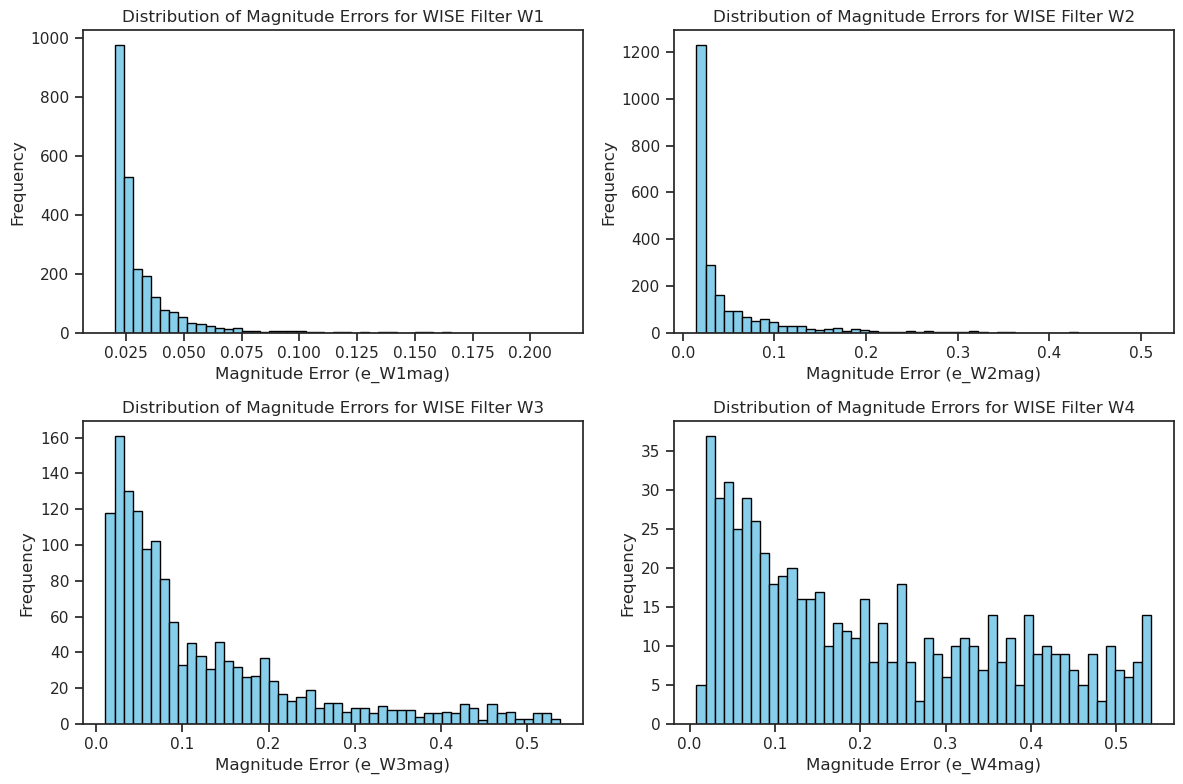

In [5]:
# Extract magnitude errors for WISE filters W1, W2, W3, W4
magnitude_errors_w1 = combined_df["e_W1mag"]
magnitude_errors_w2 = combined_df["e_W2mag"]
magnitude_errors_w3 = combined_df["e_W3mag"]
magnitude_errors_w4 = combined_df["e_W4mag"]

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for e_W1mag
axs[0, 0].hist(magnitude_errors_w1, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Magnitude Errors for WISE Filter W1')
axs[0, 0].set_xlabel('Magnitude Error (e_W1mag)')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for e_W2mag
axs[0, 1].hist(magnitude_errors_w2, bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of Magnitude Errors for WISE Filter W2')
axs[0, 1].set_xlabel('Magnitude Error (e_W2mag)')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for e_W3mag
axs[1, 0].hist(magnitude_errors_w3, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of Magnitude Errors for WISE Filter W3')
axs[1, 0].set_xlabel('Magnitude Error (e_W3mag)')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for e_W4mag
axs[1, 1].hist(magnitude_errors_w4, bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of Magnitude Errors for WISE Filter W4')
axs[1, 1].set_xlabel('Magnitude Error (e_W4mag)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [6]:
# Cleaned error

m_err_splus = (combined_df["rerr"] <= 0.2) & (combined_df["gerr"] <= 0.2) & \
        (combined_df["ierr"] <= 0.2) & (combined_df["uerr"] <= 0.2) & \
        (combined_df["F378err"] <= 0.2) & (combined_df["F395err"] <= 0.2) & \
        (combined_df["F410err"] <= 0.2) & (combined_df["F430err"] <= 0.2) & \
        (combined_df["F515err"] <= 0.2) & (combined_df["F660err"] <= 0.2) & \
        (combined_df["F861err"] <= 0.2) & (combined_df["zerr"] <= 0.2)

# Choose a threshold for the maximum allowed magnitude error
max_allowed_e_Wmag = 0.5  # Example threshold value

# Apply the threshold to filter the dataset

m_err_wise = (combined_df["e_W1mag"] <= max_allowed_e_Wmag) & \
              (combined_df["e_W2mag"] <= max_allowed_e_Wmag) 
        

mask_total = (m_err_splus & m_err_wise)

In [7]:
df_cleanErr = combined_df[mask_total]
len(df_cleanErr)

1600

In [8]:
#Selecting columns
columns = ["r",
"g",
"i",
"u",
"z",
"F378",
"F395",
"F410",
"F430",
"F515",
"F660",
"F861"]

In [9]:
df_mag = df_cleanErr[columns]
df_mag

,r,g,i,u,z,F378,F395,F410,F430,F515,F660,F861
2,18.230957,19.354897,17.535788,19.037668,16.876080,19.196240,18.976310,19.875435,19.322641,19.063953,16.866560,16.919794
13,17.534840,18.336254,17.170853,20.187351,16.968706,19.724620,19.729317,18.938953,18.896898,18.059500,17.259523,17.042841
17,18.483480,19.844840,17.338380,20.551367,16.677230,20.150150,19.926704,20.352129,20.450083,19.653934,17.486628,16.775530
20,17.863320,19.136410,17.048687,19.883158,16.445827,19.606777,19.543510,19.742111,19.557718,18.872030,17.332998,16.612194
22,17.681032,18.864336,17.329527,19.607306,16.627512,19.179401,19.058554,19.480520,19.050142,18.765682,16.344090,16.741743
...,...,...,...,...,...,...,...,...,...,...,...,...
2451,15.305303,16.063507,15.116594,17.546665,14.981738,17.157732,16.864570,16.490833,16.472755,15.829740,15.199055,14.963094
2453,15.637974,15.853651,15.490205,17.345404,15.230705,16.828485,16.692500,16.314852,16.305037,15.800333,15.462837,15.277567
2454,13.011990,14.210147,12.548910,17.032099,12.363142,17.034304,16.588572,15.726208,15.271949,13.951707,12.754676,12.091901
2455,14.515806,15.189921,14.210329,16.222795,14.051021,16.028465,15.921395,15.601741,15.537085,14.975911,14.187616,13.785573


### Creating the colors 

In [10]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

66

In [11]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [12]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_7499/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_7499/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_7499/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [13]:
df_colors_mag

,r,g,i,u,z,F378,F395,F410,F430,F515,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
2,18.230957,19.354897,17.535788,19.037668,16.876080,19.196240,18.976310,19.875435,19.322641,19.063953,...,0.552794,0.811482,3.008875,2.955641,0.258688,2.456081,2.402847,2.197393,2.144159,-0.053234
13,17.534840,18.336254,17.170853,20.187351,16.968706,19.724620,19.729317,18.938953,18.896898,18.059500,...,0.042055,0.879453,1.679430,1.896112,0.837398,1.637375,1.854057,0.799977,1.016659,0.216682
17,18.483480,19.844840,17.338380,20.551367,16.677230,20.150150,19.926704,20.352129,20.450083,19.653934,...,-0.097954,0.698195,2.865501,3.576599,0.796149,2.963455,3.674553,2.167306,2.878404,0.711098
20,17.863320,19.136410,17.048687,19.883158,16.445827,19.606777,19.543510,19.742111,19.557718,18.872030,...,0.184393,0.870081,2.409113,3.129917,0.685688,2.224720,2.945524,1.539032,2.259836,0.720804
22,17.681032,18.864336,17.329527,19.607306,16.627512,19.179401,19.058554,19.480520,19.050142,18.765682,...,0.430378,0.714838,3.136430,2.738777,0.284460,2.706052,2.308399,2.421592,2.023939,-0.397653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,15.305303,16.063507,15.116594,17.546665,14.981738,17.157732,16.864570,16.490833,16.472755,15.829740,...,0.018078,0.661093,1.291778,1.527739,0.643015,1.273700,1.509661,0.630685,0.866646,0.235961
2453,15.637974,15.853651,15.490205,17.345404,15.230705,16.828485,16.692500,16.314852,16.305037,15.800333,...,0.009815,0.514519,0.852015,1.037285,0.504704,0.842200,1.027470,0.337496,0.522766,0.185270
2454,13.011990,14.210147,12.548910,17.032099,12.363142,17.034304,16.588572,15.726208,15.271949,13.951707,...,0.454259,1.774501,2.971532,3.634307,1.320242,2.517273,3.180048,1.197031,1.859806,0.662775
2455,14.515806,15.189921,14.210329,16.222795,14.051021,16.028465,15.921395,15.601741,15.537085,14.975911,...,0.064656,0.625830,1.414125,1.816168,0.561174,1.349469,1.751512,0.788295,1.190338,0.402043


In [14]:
# Drop magnitudes
df_colors = df_colors_mag.drop(columns=columns)

In [15]:
df_colors

,r - g,r - i,r - u,r - z,r - F378,r - F395,r - F410,r - F430,r - F515,r - F660,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
2,-1.123940,0.695169,-0.806711,1.354877,-0.965283,-0.745353,-1.644478,-1.091684,-0.832996,1.364397,...,0.552794,0.811482,3.008875,2.955641,0.258688,2.456081,2.402847,2.197393,2.144159,-0.053234
13,-0.801414,0.363987,-2.652511,0.566134,-2.189780,-2.194477,-1.404113,-1.362058,-0.524660,0.275317,...,0.042055,0.879453,1.679430,1.896112,0.837398,1.637375,1.854057,0.799977,1.016659,0.216682
17,-1.361360,1.145100,-2.067887,1.806250,-1.666670,-1.443224,-1.868649,-1.966603,-1.170454,0.996852,...,-0.097954,0.698195,2.865501,3.576599,0.796149,2.963455,3.674553,2.167306,2.878404,0.711098
20,-1.273090,0.814633,-2.019838,1.417493,-1.743457,-1.680190,-1.878791,-1.694398,-1.008710,0.530322,...,0.184393,0.870081,2.409113,3.129917,0.685688,2.224720,2.945524,1.539032,2.259836,0.720804
22,-1.183304,0.351505,-1.926274,1.053520,-1.498369,-1.377522,-1.799488,-1.369110,-1.084650,1.336942,...,0.430378,0.714838,3.136430,2.738777,0.284460,2.706052,2.308399,2.421592,2.023939,-0.397653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,-0.758204,0.188709,-2.241362,0.323565,-1.852429,-1.559267,-1.185530,-1.167452,-0.524437,0.106248,...,0.018078,0.661093,1.291778,1.527739,0.643015,1.273700,1.509661,0.630685,0.866646,0.235961
2453,-0.215677,0.147769,-1.707430,0.407269,-1.190511,-1.054526,-0.676878,-0.667063,-0.162359,0.175137,...,0.009815,0.514519,0.852015,1.037285,0.504704,0.842200,1.027470,0.337496,0.522766,0.185270
2454,-1.198157,0.463080,-4.020109,0.648848,-4.022314,-3.576582,-2.714218,-2.259959,-0.939717,0.257314,...,0.454259,1.774501,2.971532,3.634307,1.320242,2.517273,3.180048,1.197031,1.859806,0.662775
2455,-0.674115,0.305477,-1.706989,0.464785,-1.512659,-1.405589,-1.085935,-1.021279,-0.460105,0.328190,...,0.064656,0.625830,1.414125,1.816168,0.561174,1.349469,1.751512,0.788295,1.190338,0.402043


***Making the color using some WISE filters***

In [16]:
# Calculate differences between W1 and each magnitude
for col in ["r", "g", "i", "u", "z"]:
    df_colors[f'diff_W1_{col}'] = df_cleanErr["W1mag"] - df_cleanErr[col]

# Calculate differences between W2 and each magnitude
for col in ["r", "g", "i", "u", "z"]:
    df_colors[f'diff_W2_{col}'] = df_cleanErr["W2mag"] - df_cleanErr[col]


In [17]:
# Calculate difference between W1 and W2
df_colors['diff_W1_W2'] = df_cleanErr['W1mag'] - df_cleanErr['W2mag']

In [18]:
for columns in df_colors.columns:
    print(columns)

r - g
r - i
r - u
r - z
r - F378
r - F395
r - F410
r - F430
r - F515
r - F660
r - F861
g - i
g - u
g - z
g - F378
g - F395
g - F410
g - F430
g - F515
g - F660
g - F861
i - u
i - z
i - F378
i - F395
i - F410
i - F430
i - F515
i - F660
i - F861
u - z
u - F378
u - F395
u - F410
u - F430
u - F515
u - F660
u - F861
z - F378
z - F395
z - F410
z - F430
z - F515
z - F660
z - F861
F378 - F395
F378 - F410
F378 - F430
F378 - F515
F378 - F660
F378 - F861
F395 - F410
F395 - F430
F395 - F515
F395 - F660
F395 - F861
F410 - F430
F410 - F515
F410 - F660
F410 - F861
F430 - F515
F430 - F660
F430 - F861
F515 - F660
F515 - F861
F660 - F861
diff_W1_r
diff_W1_g
diff_W1_i
diff_W1_u
diff_W1_z
diff_W2_r
diff_W2_g
diff_W2_i
diff_W2_u
diff_W2_z
diff_W1_W2


In [19]:
df_colors

,r - g,r - i,r - u,r - z,r - F378,r - F395,r - F410,r - F430,r - F515,r - F660,...,diff_W1_g,diff_W1_i,diff_W1_u,diff_W1_z,diff_W2_r,diff_W2_g,diff_W2_i,diff_W2_u,diff_W2_z,diff_W1_W2
2,-1.123940,0.695169,-0.806711,1.354877,-0.965283,-0.745353,-1.644478,-1.091684,-0.832996,1.364397,...,-5.959897,-4.140788,-5.642668,-3.481080,-5.436957,-6.560897,-4.741788,-6.243668,-4.082080,0.601
13,-0.801414,0.363987,-2.652511,0.566134,-2.189780,-2.194477,-1.404113,-1.362058,-0.524660,0.275317,...,-3.120254,-1.954853,-4.971351,-1.752706,-2.138840,-2.940254,-1.774853,-4.791351,-1.572706,-0.180
17,-1.361360,1.145100,-2.067887,1.806250,-1.666670,-1.443224,-1.868649,-1.966603,-1.170454,0.996852,...,-6.254840,-3.748380,-6.961367,-3.087230,-5.435480,-6.796840,-4.290380,-7.503367,-3.629230,0.542
20,-1.273090,0.814633,-2.019838,1.417493,-1.743457,-1.680190,-1.878791,-1.694398,-1.008710,0.530322,...,-6.429410,-4.341687,-7.176158,-3.738827,-5.655320,-6.928410,-4.840687,-7.675158,-4.237827,0.499
22,-1.183304,0.351505,-1.926274,1.053520,-1.498369,-1.377522,-1.799488,-1.369110,-1.084650,1.336942,...,-6.249336,-4.714527,-6.992306,-4.012512,-5.803032,-6.986336,-5.451527,-7.729306,-4.749512,0.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,-0.758204,0.188709,-2.241362,0.323565,-1.852429,-1.559267,-1.185530,-1.167452,-0.524437,0.106248,...,-2.947507,-2.000594,-4.430665,-1.865738,-2.123303,-2.881507,-1.934594,-4.364665,-1.799738,-0.066
2453,-0.215677,0.147769,-1.707430,0.407269,-1.190511,-1.054526,-0.676878,-0.667063,-0.162359,0.175137,...,-2.030651,-1.667205,-3.522404,-1.407705,-1.805974,-2.021651,-1.658205,-3.513404,-1.398705,-0.009
2454,-1.198157,0.463080,-4.020109,0.648848,-4.022314,-3.576582,-2.714218,-2.259959,-0.939717,0.257314,...,-4.751147,-3.089910,-7.573099,-2.904142,-3.424990,-4.623147,-2.961910,-7.445099,-2.776142,-0.128
2455,-0.674115,0.305477,-1.706989,0.464785,-1.512659,-1.405589,-1.085935,-1.021279,-0.460105,0.328190,...,-3.190921,-2.211329,-4.223795,-2.052021,-2.479806,-3.153921,-2.174329,-4.186795,-2.015021,-0.037


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [20]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [21]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [22]:
# Define a range of number of components to try
n_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 15, 20, 30, 50, 70, 100]

# Initialize variables to store the best parameters
best_silhouette_score = -1
best_davies_bouldin_score = np.inf
best_num_components = None
best_n_neighbors = None
best_labels = None

In [23]:
# Loop over different numbers of components and neighbors
for num_components in n_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance using Silhouette Score and Davies-Bouldin Index
        silhouette = silhouette_score(X_train_trans, labels)
        davies_bouldin = davies_bouldin_score(X_train_trans, labels)
        print(f"Components: {num_components}, Neighbors: {n_neighbors}, Silhouette Score: {silhouette}, DB Index: {davies_bouldin}")

        # Update best parameters based on combined metrics
        if silhouette > best_silhouette_score and davies_bouldin < best_davies_bouldin_score:
            best_silhouette_score = silhouette
            best_davies_bouldin_score = davies_bouldin
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best Davies-Bouldin Index: {best_davies_bouldin_score}")
print(f"Best Number of Components: {best_num_components}")
print(f"Best Number of Neighbors: {best_n_neighbors}")

/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 5, Silhouette Score: 0.43027639389038086, DB Index: 0.7960699186508848


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 10, Silhouette Score: 0.5442301630973816, DB Index: 0.6686537171763983


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 15, Silhouette Score: 0.5611504316329956, DB Index: 0.628608916622433


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 20, Silhouette Score: 0.5666190385818481, DB Index: 0.617466626918812


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 30, Silhouette Score: 0.5671432614326477, DB Index: 0.6162904241463627


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 50, Silhouette Score: 0.5734882354736328, DB Index: 0.6052413061012301


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 70, Silhouette Score: 0.5364770889282227, DB Index: 0.6653626621503612


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 2, Neighbors: 100, Silhouette Score: 0.5529506802558899, DB Index: 0.6360327898081763


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 5, Silhouette Score: 0.4797859191894531, DB Index: 0.7564941260719723


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 10, Silhouette Score: 0.40392008423805237, DB Index: 0.9470469090743276


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 15, Silhouette Score: 0.4342152178287506, DB Index: 0.746493880842949


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 20, Silhouette Score: 0.40309637784957886, DB Index: 0.9900050252544306


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 30, Silhouette Score: 0.43949031829833984, DB Index: 0.8318204006728683


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 50, Silhouette Score: 0.39073097705841064, DB Index: 0.8213730368108272


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 70, Silhouette Score: 0.41221457719802856, DB Index: 0.7922612846170668


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 3, Neighbors: 100, Silhouette Score: 0.4659878611564636, DB Index: 0.7446189949799433


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 5, Silhouette Score: 0.49160629510879517, DB Index: 0.7258560188136585


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 10, Silhouette Score: 0.45610684156417847, DB Index: 0.6850616317080884


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 15, Silhouette Score: 0.4782021939754486, DB Index: 0.6760543314548492


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 20, Silhouette Score: 0.45173248648643494, DB Index: 0.732586494179655


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 30, Silhouette Score: 0.4496263563632965, DB Index: 0.7132591598645058


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 50, Silhouette Score: 0.3845353424549103, DB Index: 0.8809204660491046


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 70, Silhouette Score: 0.4082813262939453, DB Index: 0.8546025726437687


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 4, Neighbors: 100, Silhouette Score: 0.4466419219970703, DB Index: 0.7940171081007545


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 5, Silhouette Score: 0.5095254778862, DB Index: 0.6730397126473819


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 10, Silhouette Score: 0.47119149565696716, DB Index: 0.6934653504524328


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 15, Silhouette Score: 0.45476943254470825, DB Index: 0.6954097683887492


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 20, Silhouette Score: 0.461866557598114, DB Index: 0.696712557317043


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 30, Silhouette Score: 0.485402911901474, DB Index: 0.6449302754618051


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 50, Silhouette Score: 0.4651503562927246, DB Index: 0.7096568091038683


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 70, Silhouette Score: 0.4722452163696289, DB Index: 0.6698972796661503


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 5, Neighbors: 100, Silhouette Score: 0.471177339553833, DB Index: 0.6922345484727417


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 5, Silhouette Score: 0.5331471562385559, DB Index: 0.6093270698470292


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 10, Silhouette Score: 0.470114529132843, DB Index: 0.7771877833297073


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 15, Silhouette Score: 0.49215975403785706, DB Index: 0.7390734205478224


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 20, Silhouette Score: 0.5099371671676636, DB Index: 0.6771393147985483


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 30, Silhouette Score: 0.48947930335998535, DB Index: 0.7134204932517074


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 50, Silhouette Score: 0.4732667803764343, DB Index: 0.7298694494176947


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 70, Silhouette Score: 0.5157373547554016, DB Index: 0.6389747097405767


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 10, Neighbors: 100, Silhouette Score: 0.47112035751342773, DB Index: 0.7585770408334052


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 5, Silhouette Score: 0.4567679762840271, DB Index: 0.7384438647424426


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 10, Silhouette Score: 0.44057661294937134, DB Index: 0.800263222685416


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 15, Silhouette Score: 0.43283072113990784, DB Index: 0.7738388215775259


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 20, Silhouette Score: 0.4146910607814789, DB Index: 0.9063780022436116


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 30, Silhouette Score: 0.44261568784713745, DB Index: 0.8377704475531644


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 50, Silhouette Score: 0.436156690120697, DB Index: 0.8340586795513613


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 70, Silhouette Score: 0.44077080488204956, DB Index: 0.8092132209473386


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 20, Neighbors: 100, Silhouette Score: 0.3950992226600647, DB Index: 0.896398288660756


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 5, Silhouette Score: 0.47028955817222595, DB Index: 0.714221207479152


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 10, Silhouette Score: 0.44745850563049316, DB Index: 0.7537384474878103


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 15, Silhouette Score: 0.4352499842643738, DB Index: 0.7887649130557247


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 20, Silhouette Score: 0.43100014328956604, DB Index: 0.7900017491130853


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 30, Silhouette Score: 0.4129813313484192, DB Index: 0.799931148908749


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 50, Silhouette Score: 0.3846415877342224, DB Index: 0.8594653174148087


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 70, Silhouette Score: 0.38392359018325806, DB Index: 0.8553631784789271


/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Components: 50, Neighbors: 100, Silhouette Score: 0.3837250769138336, DB Index: 0.8655504203496254
Best Silhouette Score: 0.5734882354736328
Best Davies-Bouldin Index: 0.6052413061012301
Best Number of Components: 2
Best Number of Neighbors: 50


In [24]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")

Best number of components: 2, Best number of neighbors: 50, Best Silhouette Score: 0.5734882354736328


#### Try UMAP

In [25]:
num_components = 2
reducer = umap.UMAP(n_neighbors=50, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

/home/luis/anaconda3/envs/my-env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize the cumulative explained variance ratio:

In [26]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

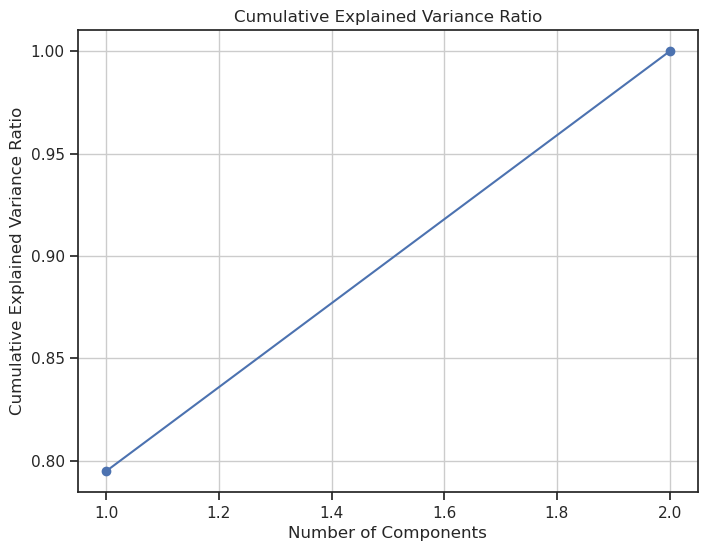

In [27]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [28]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2
0,5.346002,-4.875674
1,0.565818,0.625969
2,5.912562,-4.966827
3,5.786485,-4.869331
4,5.263153,-4.783495
...,...,...
1595,-1.285968,0.466680
1596,-3.187696,1.383426
1597,6.318359,0.938920
1598,0.411976,1.654101


/tmp/ipykernel_7499/2557880244.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


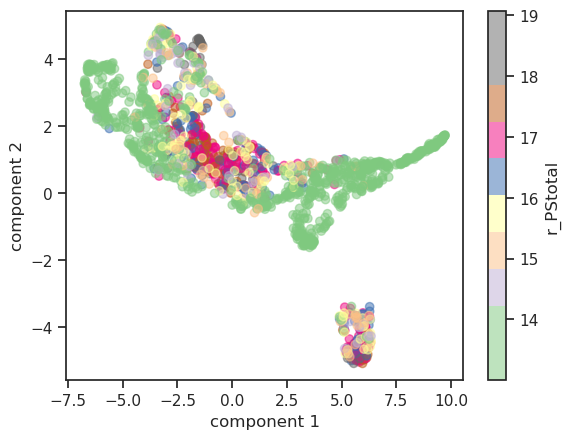

In [29]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

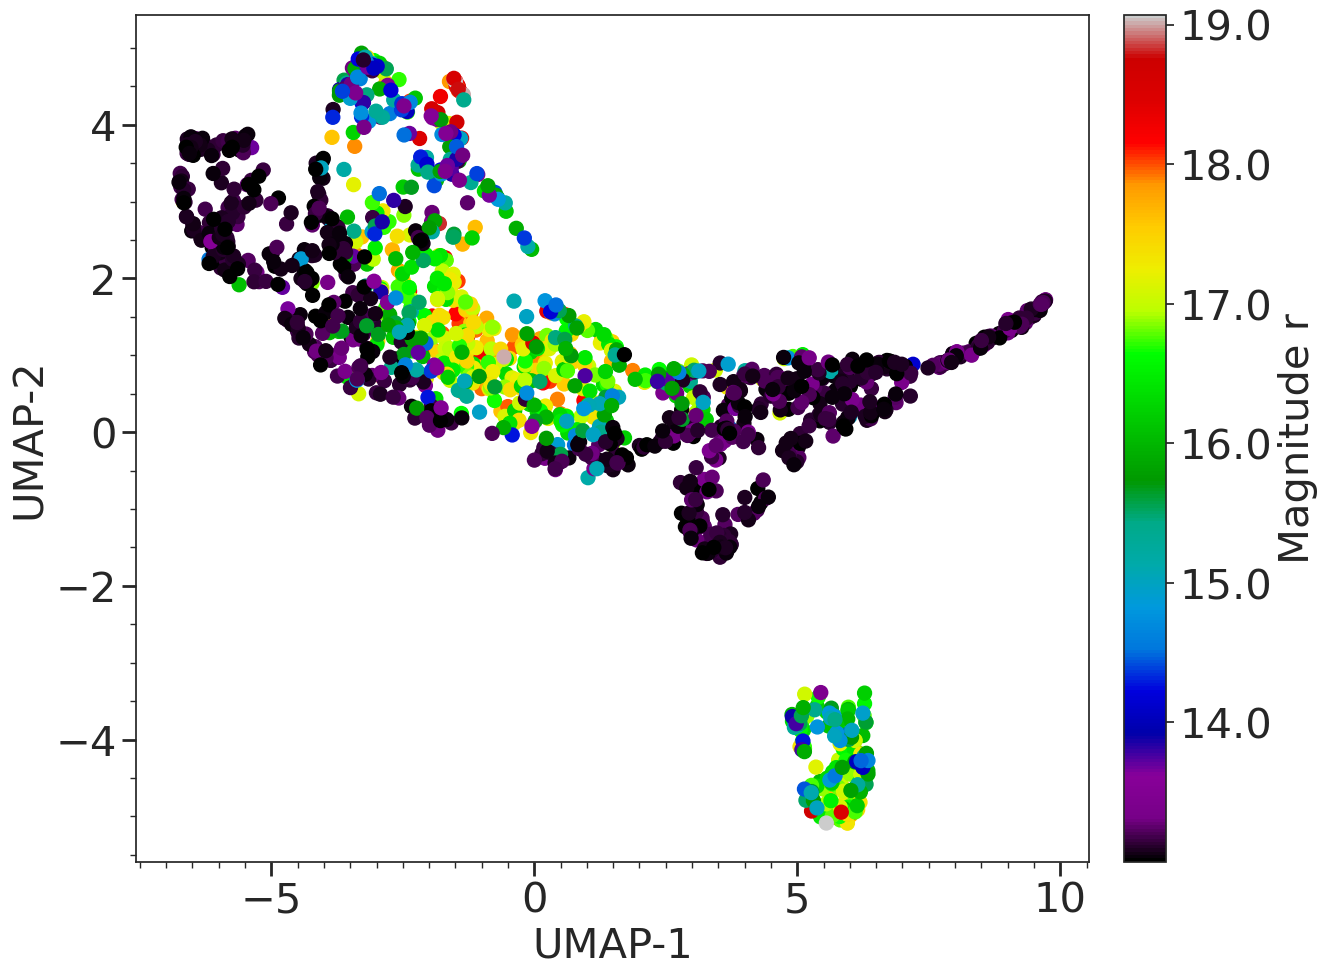

In [30]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_cleanErr["r"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

plt.savefig("../Figs/umap_splus_disk_wise.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [31]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [32]:
best_score = -1
best_params = {}


In [33]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [34]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 5, 'min_cluster_size': 40}
Best silhouette score: 0.3583065


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [35]:
clusterer = hdbscan.HDBSCAN(min_samples=5
                            , min_cluster_size=30, prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [36]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [37]:
clusterer.metric

'euclidean'

In [38]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)


In [39]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of cluster points 0: 165
Estimated number of cluster points 1: 1435
Estimated number of cluster points 2: 0
Estimated number of cluster points 3: 0
Estimated number of cluster points 4: 0
Estimated number of cluster points 5: 0
Estimated number of noise points: 0


<Axes: >

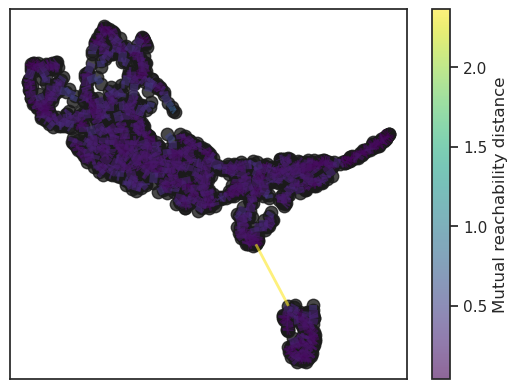

In [40]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

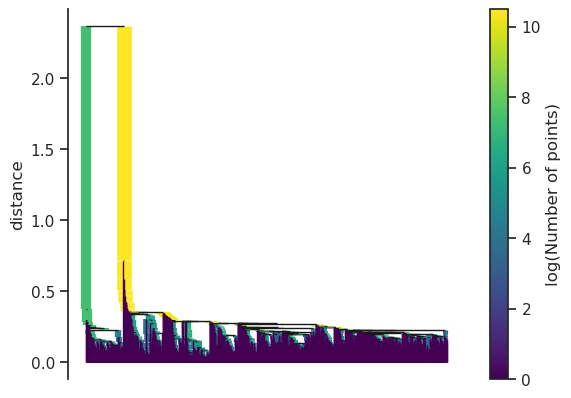

In [41]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

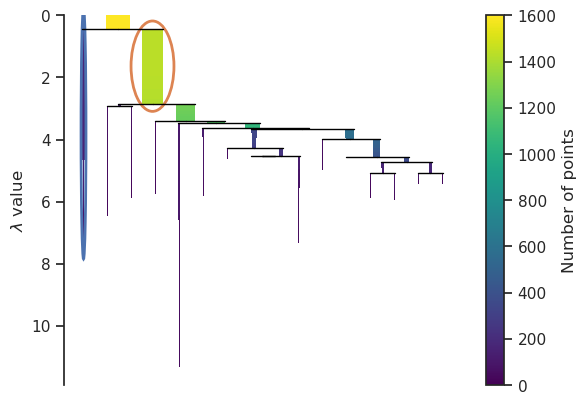

In [42]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

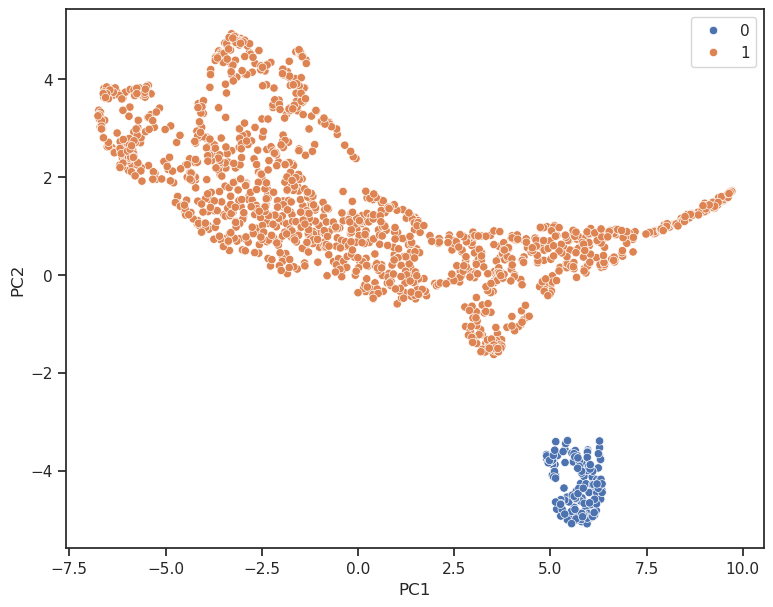

In [43]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

By resetting the indexes with reset_index(drop=True), you ensure that each DataFrame's index starts from 0, effectively aligning the rows properly for concatenation. Then you can concatenate them horizontally without encountering issues due to mismatched indexes.

In [44]:
# Concatenat the original claen table with the umap results
df_cleanErr.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_cleanErr, umap_df], axis=1)

Create the tables for each clase

In [45]:
df_cleanErr_umap["Label"] = labels

In [46]:
df_cleanErr_umap

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,PC1,PC2,Label
0,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,AABU,11.0,130.0,357.0,126.0,0.101,0.050432,5.346002,-4.875674,0
1,31027,96.380727,-11.498935,20.187351,0.116755,18.336254,0.022047,17.534840,0.012274,17.170853,...,AAUU,37.0,199.0,133.0,210.0,0.173,0.156846,0.565818,0.625969,1
2,48545,104.706912,-11.509994,20.551367,0.109780,19.844840,0.039130,18.483480,0.014737,17.338380,...,AAAB,0.0,115.0,0.0,114.0,0.212,0.276755,5.912562,-4.966827,0
3,48419,106.005496,-11.604849,19.883158,0.062065,19.136410,0.032343,17.863320,0.013319,17.048687,...,AAUU,NaN,NaN,NaN,NaN,0.247,0.135226,5.786485,-4.869331,0
4,54599,106.174438,-11.549660,19.607306,0.050901,18.864336,0.026002,17.681032,0.011791,17.329527,...,AAAB,10.0,52.0,82.0,92.0,0.093,0.038892,5.263153,-4.783495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,218156,135.343038,-56.133451,17.546665,0.018058,16.063507,0.005076,15.305303,0.002869,15.116594,...,AACU,-23.0,53.0,79.0,55.0,0.133,0.212013,-1.285968,0.466680,1
1596,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,AAUU,138.0,57.0,318.0,63.0,0.325,0.422898,-3.187696,1.383426,1
1597,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,AAAU,0.0,28.0,55.0,29.0,0.080,0.119198,6.318359,0.938920,1
1598,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,AABU,28.0,35.0,1.0,38.0,0.088,0.089227,0.411976,1.654101,1


**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=5, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [47]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [48]:
# Define the directory where you want to save the CSV files
directory = '../Class_disk-wise-unique/'

In [49]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_disk_wise_noise.csv'
    else:
        filename = f'Halpha_emitter_disk_wise_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)